In [58]:
import sqlite3
import pandas as pd
import numpy as np

In [59]:
ls *.db

 Volume in drive C is OS
 Volume Serial Number is 74EA-F0BF

 Directory of C:\Users\Daniela

2018-08-13  09:14 PM                 0 database.db
2018-08-13  11:46 AM           749,568 database_test_behaviour.db
               2 File(s)        749,568 bytes
               0 Dir(s)  168,827,092,992 bytes free


### Load in the Data and Examine

In [60]:
con = sqlite3.connect('database_test_behaviour.db')

In [61]:
cursor = con.cursor()

In [62]:

cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")


In [63]:
print(cursor.fetchall())

[('game_started',), ('purchases',)]


#### Dump the table from database to csv in Pandas

In [64]:
db = sqlite3.connect('database_test_behaviour.db')
table = pd.read_sql_query("SELECT * from 'game_started'", db)
table.to_csv('game_started' + '.csv', index_label='index')

In [65]:
game_started = pd.read_csv('game_started.csv')

In [66]:
print('game_started data shape: ', game_started.shape)

game_started data shape:  (9775, 6)


In [67]:
game_started.head()

,index,date,user_id,build_version,store_id,player_level
0,0,2018-01-16,00db71c6-e9df-4663-8b96-baf8233a1ffb,0.8,iOS,15.0
1,1,2018-01-16,00db71c6-e9df-4663-8b96-baf8233a1ffb,0.8,iOS,3.0
2,2,2018-01-16,00db71c6-e9df-4663-8b96-baf8233a1ffb,0.8,iOS,7.0
3,3,2018-01-16,00db71c6-e9df-4663-8b96-baf8233a1ffb,0.8,iOS,3.0
4,4,2018-01-16,00ff74d5-2db1-4f9b-9c01-dde5b8a420a6,0.8,iOS,4.0


In [68]:
table = pd.read_sql_query("SELECT * from 'purchases'", db)
table.to_csv('purchases' + '.csv', index_label='index')

In [69]:
purchases = pd.read_csv('purchases.csv')

In [70]:
print('purchases data shape: ', purchases.shape)

purchases data shape:  (419, 8)


In [71]:
purchases.head(20)

,index,date,user_id,build_version,store_id,player_level,store_item_name,dollar_spent
0,0,2018-01-25,961f4389-e833-4f45-8e91-7074d90f77bd,0.8,iOS,3.0,bundle_1,15.99
1,1,2018-01-29,ed39ad9a-3db4-4c86-9df8-f94c9997a93b,1.2,iOS,5.0,bundle_8,18.50
2,2,2018-01-29,b6bab288-d92b-4965-ae84-a15ea06f2809,1.2,iOS,3.0,pack_d,2.50
3,3,2018-01-29,b6bab288-d92b-4965-ae84-a15ea06f2809,1.2,iOS,3.0,pack_a,0.99
4,4,2018-01-19,9966011a-6c63-406b-a50e-97054e4deabd,0.8,iOS,26.0,bundle_3,21.99
5,5,2018-01-29,ed39ad9a-3db4-4c86-9df8-f94c9997a93b,1.2,iOS,5.0,bundle_2,1.50
6,6,2018-01-24,a01933b1-8a98-4c93-b768-9773c7df67f2,1.2,iOS,4.0,bundle_3,21.99
7,7,2018-01-18,839cea33-cc63-45ea-bf7c-421c6a660167,0.8,Google play,16.0,bundle_8,18.50
8,8,2018-01-19,61a971f2-9022-44a6-bd26-ac6dd5172be2,0.8,iOS,3.0,bundle_3,21.99
9,9,2018-01-18,c8819387-3b84-4bdc-be00-36d0a9190628,0.8,Google play,13.0,bundle_10,18.50


#### Checking for missing values

In [72]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [73]:
# Missing values statistics
missing_values = missing_values_table(game_started)
missing_values.head(20)

Your selected dataframe has 6 columns.
There are 4 columns that have missing values.


,Missing Values,% of Total Values
player_level,6,0.1
user_id,1,0.0
build_version,1,0.0
store_id,1,0.0


In [74]:
# Missing values statistics
missing_values = missing_values_table(purchases)
missing_values.head(20)

Your selected dataframe has 8 columns.
There are 6 columns that have missing values.


,Missing Values,% of Total Values
user_id,1,0.2
build_version,1,0.2
store_id,1,0.2
player_level,1,0.2
store_item_name,1,0.2
dollar_spent,1,0.2


### Question A

- __Daily Active Customer__

In [75]:
game_started.groupby(['date']).count()

,index,user_id,build_version,store_id,player_level
date,,,,,
\r\n,1,0,0,0,0
2018-01-16,752,752,752,752,752
2018-01-17,986,986,986,986,983
2018-01-18,695,695,695,695,695
2018-01-19,791,791,791,791,791
2018-01-20,104,104,104,104,104
2018-01-21,27,27,27,27,27
2018-01-22,544,544,544,544,544
2018-01-23,511,511,511,511,511


In [76]:
game_started.dtypes

index              int64
date              object
user_id           object
build_version     object
store_id          object
player_level     float64
dtype: object

In [77]:
missing_values = missing_values_table(game_started)
missing_values.head(20)

Your selected dataframe has 6 columns.
There are 4 columns that have missing values.


,Missing Values,% of Total Values
player_level,6,0.1
user_id,1,0.0
build_version,1,0.0
store_id,1,0.0


In [78]:
pd.isnull(np.datetime64('NaT'))

True

In [79]:
game_started['date'].str.contains('\r\n')

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
9745    False
9746    False
9747    False
9748    False
9749    False
9750    False
9751    False
9752    False
9753    False
9754    False
9755    False
9756    False
9757    False
9758    False
9759    False
9760    False
9761    False
9762    False
9763    False
9764    False
9765    False
9766    False
9767    False
9768    False
9769    False
9770    False
9771    False
9772    False
9773    False
9774     True
Name: date, Length: 9775, dtype: bool

In [80]:
game_started = game_started.replace('\r\n', np.nan).dropna()


In [81]:
#game_started['date'] =  pd.to_datetime(game_started['date'],  infer_datetime_format=True)


In [82]:
game_started.dtypes

index              int64
date              object
user_id           object
build_version     object
store_id          object
player_level     float64
dtype: object

In [83]:
game_started.isnull().sum()

index            0
date             0
user_id          0
build_version    0
store_id         0
player_level     0
dtype: int64

In [84]:
game_started.dropna(subset=['user_id'], inplace=True)

In [85]:
game_started['date'] = pd.to_datetime(game_started['date'])

In [86]:
game=game_started.groupby(['date']).count()


In [87]:
game.head(20)

,index,user_id,build_version,store_id,player_level
date,,,,,
2018-01-16,752,752,752,752,752
2018-01-17,983,983,983,983,983
2018-01-18,695,695,695,695,695
2018-01-19,791,791,791,791,791
2018-01-20,104,104,104,104,104
2018-01-21,27,27,27,27,27
2018-01-22,544,544,544,544,544
2018-01-23,511,511,511,511,511
2018-01-24,659,659,659,659,659


In [88]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

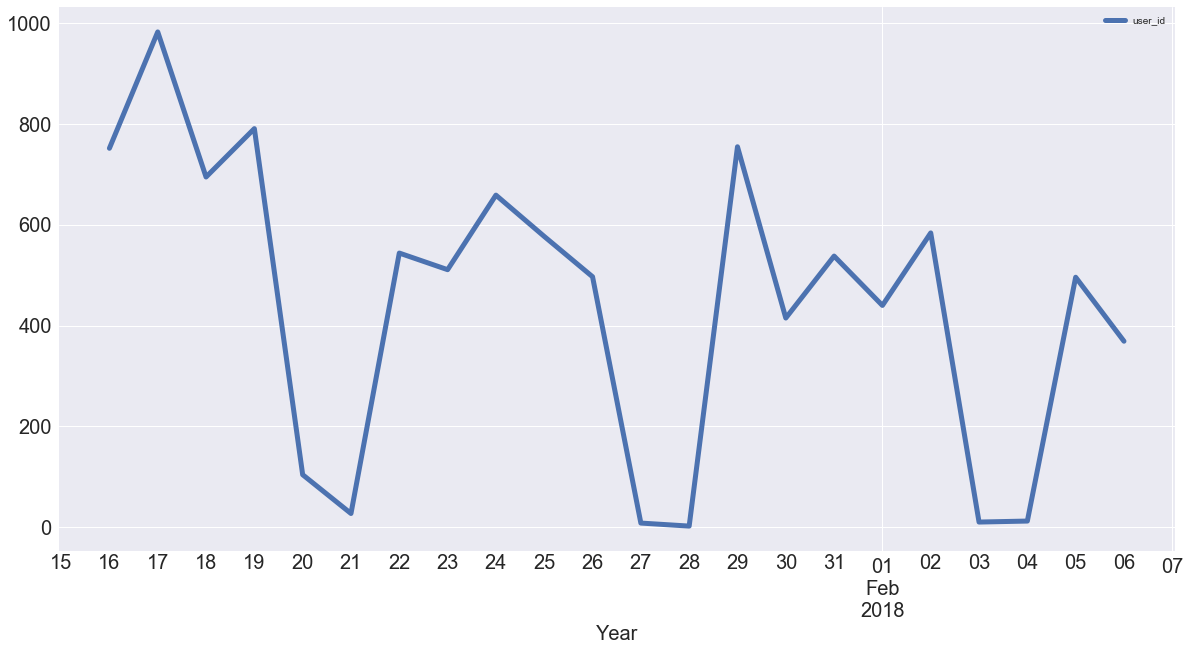

In [89]:
game[['user_id']].plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

As per the the table and plot from above, the number of active customers are very high at the begining of the period (I imagine is the relase of the game), the variation is not very high following that period, but has few drop-downs due to some game updates (I guess), where after that the activity increases again.


- __Daily Active User Per build version and player level__

In [90]:
Daily_Active_User=game_started.groupby(['date','build_version','player_level']).count()
Daily_Active_User.head()

index  user_id  store_id
date       build_version player_level                          
2018-01-16 0.0.1         3.0             148      148       148
                         4.0               3        3         3
                         5.0               5        5         5
                         15.0              7        7         7
                         29.0              5        5         5

In [91]:
game_started.dtypes

index                     int64
date             datetime64[ns]
user_id                  object
build_version            object
store_id                 object
player_level            float64
dtype: object

In [92]:
Daily_Active_User=game_started.groupby(['date','build_version','player_level'],as_index=False).count()
Daily_Active_User.head()

,date,build_version,player_level,index,user_id,store_id
0,2018-01-16,0.0.1,3.0,148,148,148
1,2018-01-16,0.0.1,4.0,3,3,3
2,2018-01-16,0.0.1,5.0,5,5,5
3,2018-01-16,0.0.1,15.0,7,7,7
4,2018-01-16,0.0.1,29.0,5,5,5


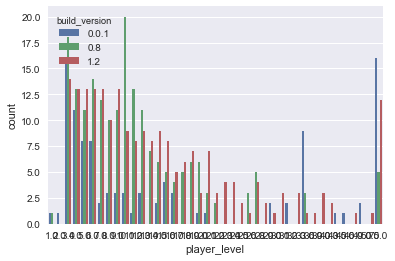

In [93]:
import seaborn as sns
ax = sns.countplot(x="player_level", hue="build_version", data=Daily_Active_User)

As per the the table and plot from above, more players with low lever are playing the new versions (second and third) of the game, while very few players reached a higher level with the old version. This might be due to the fact that they kept playing and did not upgrade the version. 

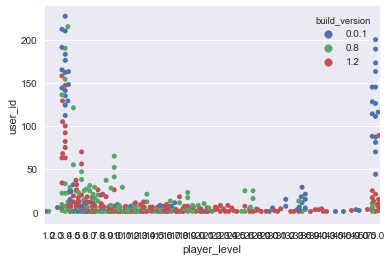

In [94]:
# Swarmplot 
sns.swarmplot(x='player_level', y='user_id', data=Daily_Active_User, 
              hue='build_version')

As per the the table and plot from above, more players played the old versions at the release of the game, followed by a uniform distrbution in players's level using the second and third version.



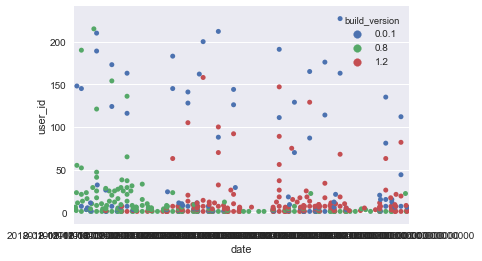

In [95]:
# Swarmplot with melted_df
sns.swarmplot(x='date', y='user_id', data=Daily_Active_User, 
              hue='build_version')

As per the the table and plot from above, over the studied period, the old vesion was used by more users in large variations, while the second and third version were used by fewer players, but in a uniform distribution.

- __Daily Revenue__

In [96]:
purchases = purchases.replace('\r\n', np.nan).dropna()
purchases.head()

,index,date,user_id,build_version,store_id,player_level,store_item_name,dollar_spent
0,0,2018-01-25,961f4389-e833-4f45-8e91-7074d90f77bd,0.8,iOS,3.0,bundle_1,15.99
1,1,2018-01-29,ed39ad9a-3db4-4c86-9df8-f94c9997a93b,1.2,iOS,5.0,bundle_8,18.50
2,2,2018-01-29,b6bab288-d92b-4965-ae84-a15ea06f2809,1.2,iOS,3.0,pack_d,2.50
3,3,2018-01-29,b6bab288-d92b-4965-ae84-a15ea06f2809,1.2,iOS,3.0,pack_a,0.99
4,4,2018-01-19,9966011a-6c63-406b-a50e-97054e4deabd,0.8,iOS,26.0,bundle_3,21.99


In [97]:
purchases['date'] = pd.to_datetime(purchases['date'])

In [98]:
d=purchases.groupby(['date', 'store_item_name'], as_index=True).sum()
d.head()

index  build_version  player_level  dollar_spent
date       store_item_name                                                  
2018-01-16 bundle_1           203            1.6          17.0         31.98
           bundle_8           437            1.6           7.0         37.00
           bundle_9           266            0.8           1.0         18.50
           pack_a             149            0.8           1.0          0.99
           pack_b              22            0.8           1.0          1.20

In [99]:
dr=purchases.groupby(['date', 'store_item_name'], as_index=False).sum()
dr.head(10)

,date,store_item_name,index,build_version,player_level,dollar_spent
0,2018-01-16,bundle_1,203,1.6,17.0,31.98
1,2018-01-16,bundle_8,437,1.6,7.0,37.00
2,2018-01-16,bundle_9,266,0.8,1.0,18.50
3,2018-01-16,pack_a,149,0.8,1.0,0.99
4,2018-01-16,pack_b,22,0.8,1.0,1.20
5,2018-01-16,pack_e,16,0.8,1.0,5.00
6,2018-01-18,bundle_1,989,3.2,17.0,63.96
7,2018-01-18,bundle_10,1600,7.2,73.0,166.50
8,2018-01-18,bundle_2,714,2.4,18.0,4.50
9,2018-01-18,bundle_3,1364,4.8,39.0,131.94


In [100]:
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

C:\Users\Daniela\Anaconda3\lib\site-packages\seaborn\categorical.py:2783: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


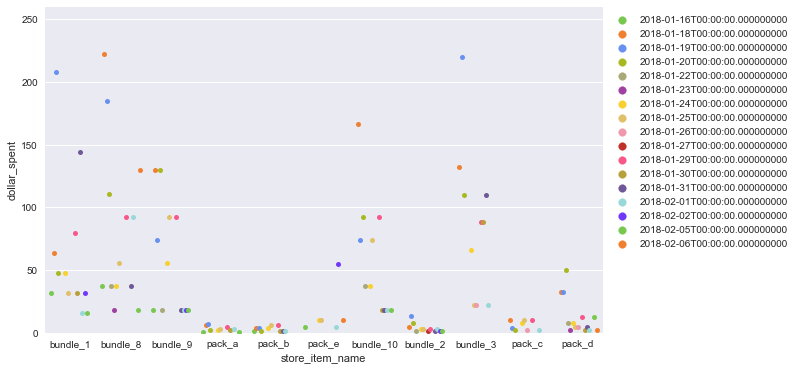

In [101]:
 # 1. Enlarge the plot
plt.figure(figsize=(10,6))
 
sns.swarmplot(x='store_item_name', 
              y='dollar_spent', 
              data=dr, 
              hue='date', 
              split=True, # 2. Separate points by hue
              palette=pkmn_type_colors) # 3. Use Pokemon palette
 
# 4. Adjust the y-axis
plt.ylim(0, 260)
 
# 5. Place legend to the right
plt.legend(bbox_to_anchor=(1, 1), loc=2)

As per the the table and plot from above, over the studied period, the items bundle_1,2,3,8,9 and 10 seems to be preffered among players and to bring the most of revenue.

- __Daily Conversion__

Number of unique player who made a purchase

In [102]:
len(set(purchases['user_id']))

90

Daily Conversion 

In [103]:
r=purchases.groupby(['date'], as_index=True)['user_id'].count()
r.head(10)

date
2018-01-16     8
2018-01-18    68
2018-01-19    75
2018-01-20    55
2018-01-22     9
2018-01-23     2
2018-01-24    29
2018-01-25    34
2018-01-26     4
2018-01-27     1
Name: user_id, dtype: int64

Daily Conversion in percentage

In [104]:
conversion=purchases.groupby(['date'], as_index=True)['user_id'].count()/90*100
conversion.head(10)

date
2018-01-16     8.888889
2018-01-18    75.555556
2018-01-19    83.333333
2018-01-20    61.111111
2018-01-22    10.000000
2018-01-23     2.222222
2018-01-24    32.222222
2018-01-25    37.777778
2018-01-26     4.444444
2018-01-27     1.111111
Name: user_id, dtype: float64

Daily Conversion per pack

In [105]:
re=purchases.groupby(['date', 'store_item_name'], as_index=True)['user_id'].count()/90*100
re.head(10)

date        store_item_name
2018-01-16  bundle_1            2.222222
            bundle_8            2.222222
            bundle_9            1.111111
            pack_a              1.111111
            pack_b              1.111111
            pack_e              1.111111
2018-01-18  bundle_1            4.444444
            bundle_10          10.000000
            bundle_2            3.333333
            bundle_3            6.666667
Name: user_id, dtype: float64

As per the tables  from above,first few days after the release, the daily conversion is high, especially for the bundle items.

### Qestion B

__What segments will you use and how will you create it?__

Two segments would be very interesting to see: 
- the players who spend in the game: on what/ how much?
- the players who are more active: when during the day/night and how many minutes

For this, more complex and elaborated data is necessary. Otherwise, the analysis on these segments will look similar to the one from question C.
For the active players, I would separate them by day-hours and night-hours (hours corresponding to their country, log-in hour), minutes spent, in order to know when is best time to upgrade or release version. 

### Question C

- Point A: During the first day of game release, many users are active, as they were waiting to play the game
- Point B: After the Game update: possible there are few bugs, and users cannot play the game; the number of users drop down
- Point C: After the game has been fixed, the daily variation in active users has a positive variation above the average 